## Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [3]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

## Load Data

In [4]:
np.array(sns.get_dataset_names()).reshape(1,-1)

array([['anagrams', 'anscombe', 'attention', 'brain_networks',
        'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise',
        'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg',
        'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic',
        'anagrams', 'anagrams', 'anscombe', 'anscombe', 'attention',
        'attention', 'brain_networks', 'brain_networks', 'car_crashes',
        'car_crashes', 'diamonds', 'diamonds', 'dots', 'dots',
        'dowjones', 'dowjones', 'exercise', 'exercise', 'flights',
        'flights', 'fmri', 'fmri', 'geyser', 'geyser', 'glue', 'glue',
        'healthexp', 'healthexp', 'iris', 'iris', 'mpg', 'mpg',
        'penguins', 'penguins', 'planets', 'planets', 'seaice', 'seaice',
        'taxis', 'taxis', 'tips', 'tips', 'titanic', 'titanic',
        'anagrams', 'anscombe', 'attention', 'brain_networks',
        'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise',
        'flights', 'fmri', 'geyser', 'glue', 'healthex

In [5]:
diamonds_df = sns.load_dataset('diamonds')
diamonds_df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


### Histrogram Plot

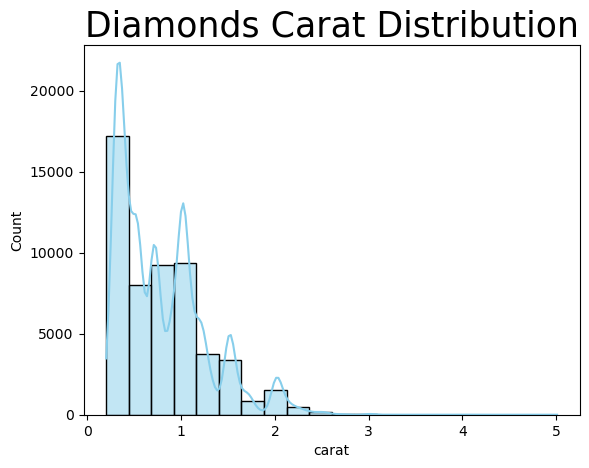

In [6]:
sns.histplot(diamonds_df.carat,color = 'skyblue',bins = 20,kde = True)
plt.title('Diamonds Carat Distribution',fontsize = 25)
plt.show()

In [7]:
data = diamonds_df.iloc[:,0]
bin_width = 3.5 * np.std(data) / (len(data) ** (1/3))

# Calculate number of bins
num_bins = int((max(data) - min(data)) / bin_width)

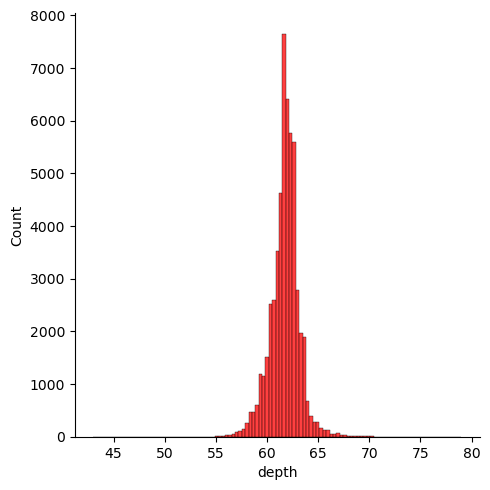

In [8]:
sns.displot(diamonds_df['depth'],bins = num_bins,color = 'red')
plt.show()

In [9]:
diamonds_df = diamonds_df.sample(n = 100)

In [10]:
diamonds_df.shape

(100, 10)

### Joint Plot

In [11]:
diamonds_df['log_carat'] = np.log(diamonds_df.carat)
diamonds_df['log_price'] = np.log(diamonds_df.price)

<Figure size 640x480 with 0 Axes>

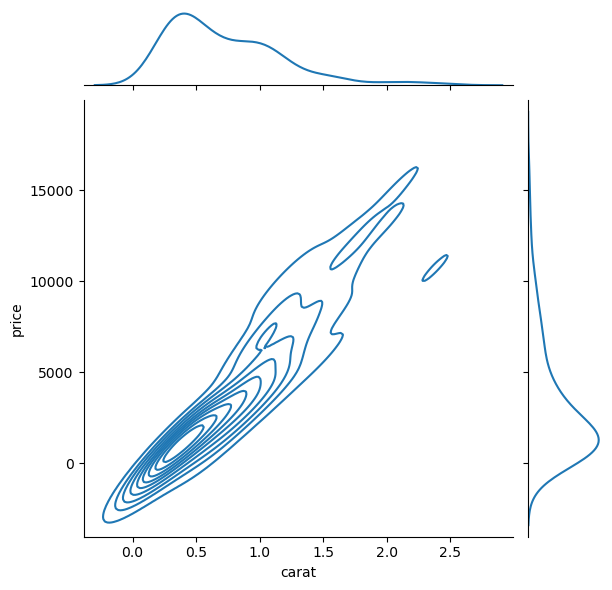

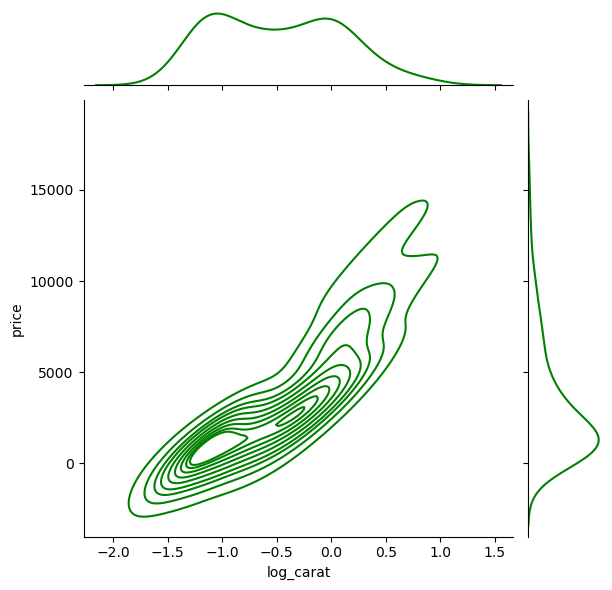

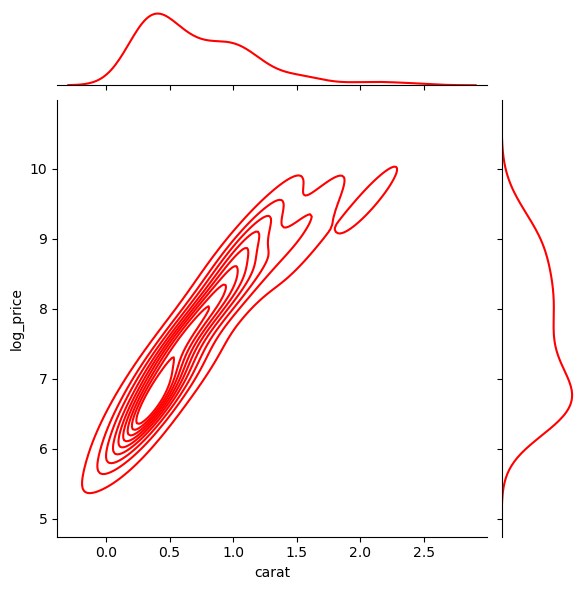

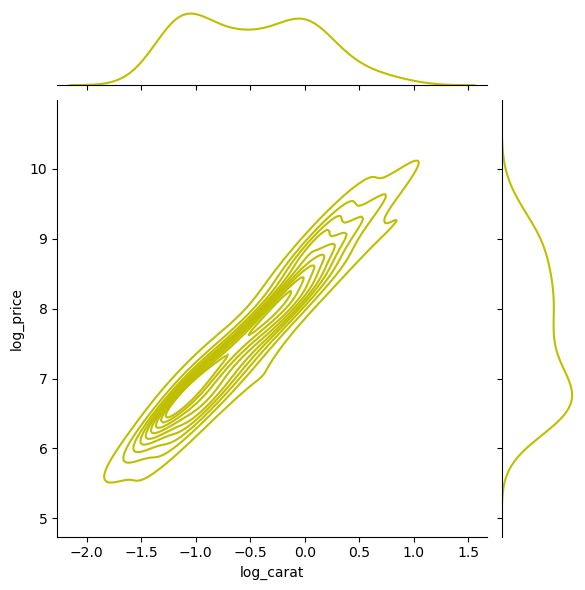

In [13]:
plt.figure(141)
sns.jointplot(x = 'carat',y = 'price',data = diamonds_df,kind = 'kde')
plt.figure(142)
sns.jointplot(x = 'log_carat',y = 'price',data = diamonds_df,kind = 'kde',color = 'g')
plt.figure(143)
sns.jointplot(x = 'carat',y = 'log_price',data = diamonds_df,kind = 'kde',color = 'r')
plt.figure(144)
sns.jointplot(x = 'log_carat',y = 'log_price',data = diamonds_df,kind = 'kde',color = 'y')
plt.show()

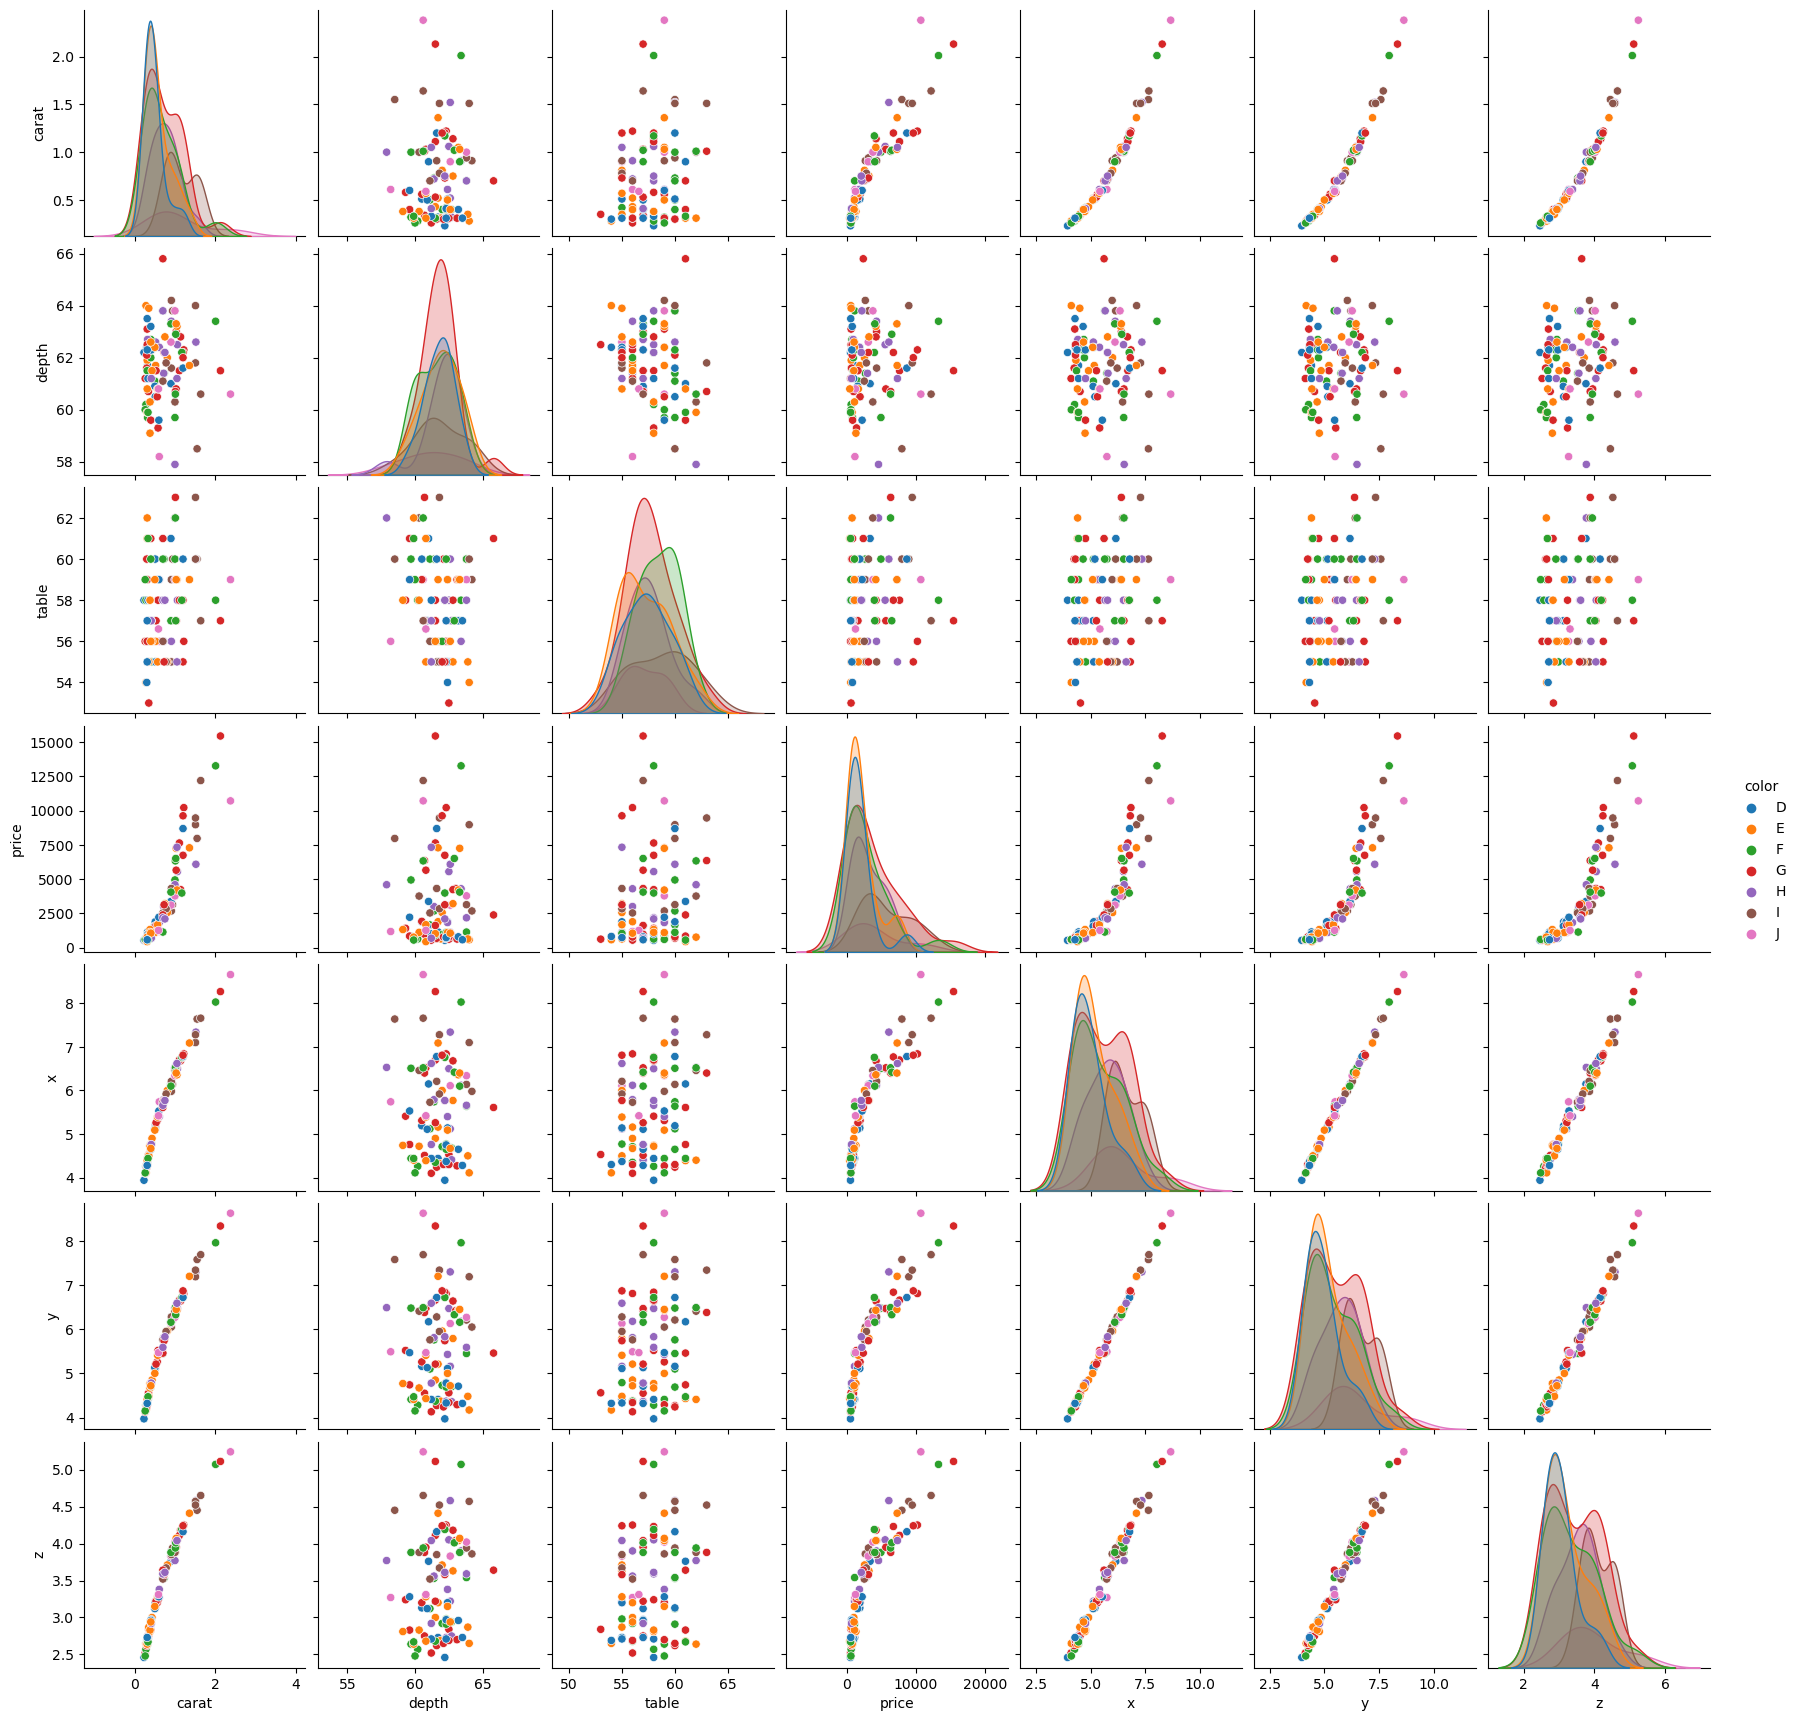

In [43]:
sns.pairplot(diamonds_df.iloc[:,:-2],palette = sns.color_palette(n_colors = len(diamonds_df.color.unique())),hue = 'color')
plt.show()

In [20]:
diamonds_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 53448 to 18113
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   carat      100 non-null    float64 
 1   cut        100 non-null    category
 2   color      100 non-null    category
 3   clarity    100 non-null    category
 4   depth      100 non-null    float64 
 5   table      100 non-null    float64 
 6   price      100 non-null    int64   
 7   x          100 non-null    float64 
 8   y          100 non-null    float64 
 9   z          100 non-null    float64 
 10  log_carat  100 non-null    float64 
 11  log_price  100 non-null    float64 
dtypes: category(3), float64(8), int64(1)
memory usage: 9.0 KB


In [34]:
corrs = diamonds_df.iloc[:,:-2].select_dtypes(exclude = diamonds_df.cut.dtype).corr()
corrs

,carat,depth,table,price,x,y,z
carat,1.000000,0.046372,0.229535,0.936967,0.978024,0.979535,0.976311
depth,0.046372,1.000000,-0.243798,0.019193,0.006550,0.012487,0.127000
table,0.229535,-0.243798,1.000000,0.174786,0.230844,0.223638,0.199475
price,0.936967,0.019193,0.174786,1.000000,0.906244,0.910123,0.903614
x,0.978024,0.006550,0.230844,0.906244,1.000000,0.998555,0.992088
y,0.979535,0.012487,0.223638,0.910123,0.998555,1.000000,0.992875
z,0.976311,0.127000,0.199475,0.903614,0.992088,0.992875,1.000000


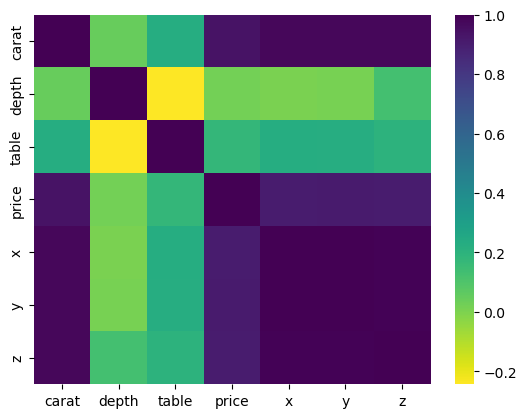

In [35]:
sns.heatmap(corrs,cmap = 'viridis_r')
plt.show()

In [45]:
diamonds_df.select_dtypes(include = 'category')

cut        color  clarity
Very Good  F      SI1        5
Premium    D      VS2        4
Ideal      I      VS2        3
           G      VS1        3
Very Good  G      VS1        2
                            ..
Premium    I      SI2        1
Ideal      D      VVS2       1
Very Good  D      VVS2       1
                  SI2        1
Fair       J      VS2        1
Name: count, Length: 77, dtype: int64

In [52]:
def show_num_unique(df:pd.DataFrame):
    cols = df.columns
    for col in cols:
        print(col,": ",len(df.loc[:,col].unique()))

In [53]:
show_num_unique(diamonds_df.select_dtypes(include = 'category'))

cut :  5
color :  7
clarity :  8
